# Homework 2
# Introduction and Understanding Pixel Value Scaling, Normalization and Data Augmentation
This homework is focusing on libraries such as PIL, Numpy, and PyTorch.
In the lecture, it is very important to understand that the format of image and each library. Image is in the format of H x W(number of row, number of column), like matrix. Numpy is in the format of (H, W, C), while Pytorch is (C, H, W).
For the image preprocessing part for our neural network, we have to scaling image data to floating point range, and normalize it to floating point range (-1.0, 1.0) to center the data around zero. These steps improve the convergence behavior during training.
Data augmentation is a method that can reduce overfitting and improve generalization, it has function such as random rotation, flips, and cropping, these introduce variabiltiy of the dataset.

# 3.1 Conda Environment
After anaconda installation, I initialize conda env by using 
```
conda init
```
After that, create a ECE60146 conda environment
```
conda create --name ece60146 python=3.10
```
And activate this environment by 
```
conda activate ece60146
```
After activating the environment, download the necessary packages by 
```
conda install pytorch torchvision -c pytorch
```
Finally, use this command to export a snapshot of the package dependencies
```
conda env export > environment.yml
```


# 3.2 Comparing CIFAR10 with a Custom Dataset
To prepare for CIFAR10 dataset, we can utilize torchvision library to download the CIFAR10. By setting the selected class and get their indices, we can create a subset that contains50 images.


To load the dataset we created, ImageLodaer does not work in this case, so we need to create a custom data loader, I use the code in skeleton code in this homework. After loading, we need to do transformation(augmentation) for the data. First, we need to resize the dimension in order to meet the dimension of CIFAR10's dimension, then RandomRotation, ColorJitter, and most importantly, ToTensor is applied to the data. After everything is done, we use matplotlib to display few samples from both datasets.

Files already downloaded and verified
image shape: torch.Size([3, 32, 32])
augmented_images shape: torch.Size([3, 32, 32])
Size of CIFAR10 subset: 50 images
Size of Custom Dataset: 50 images


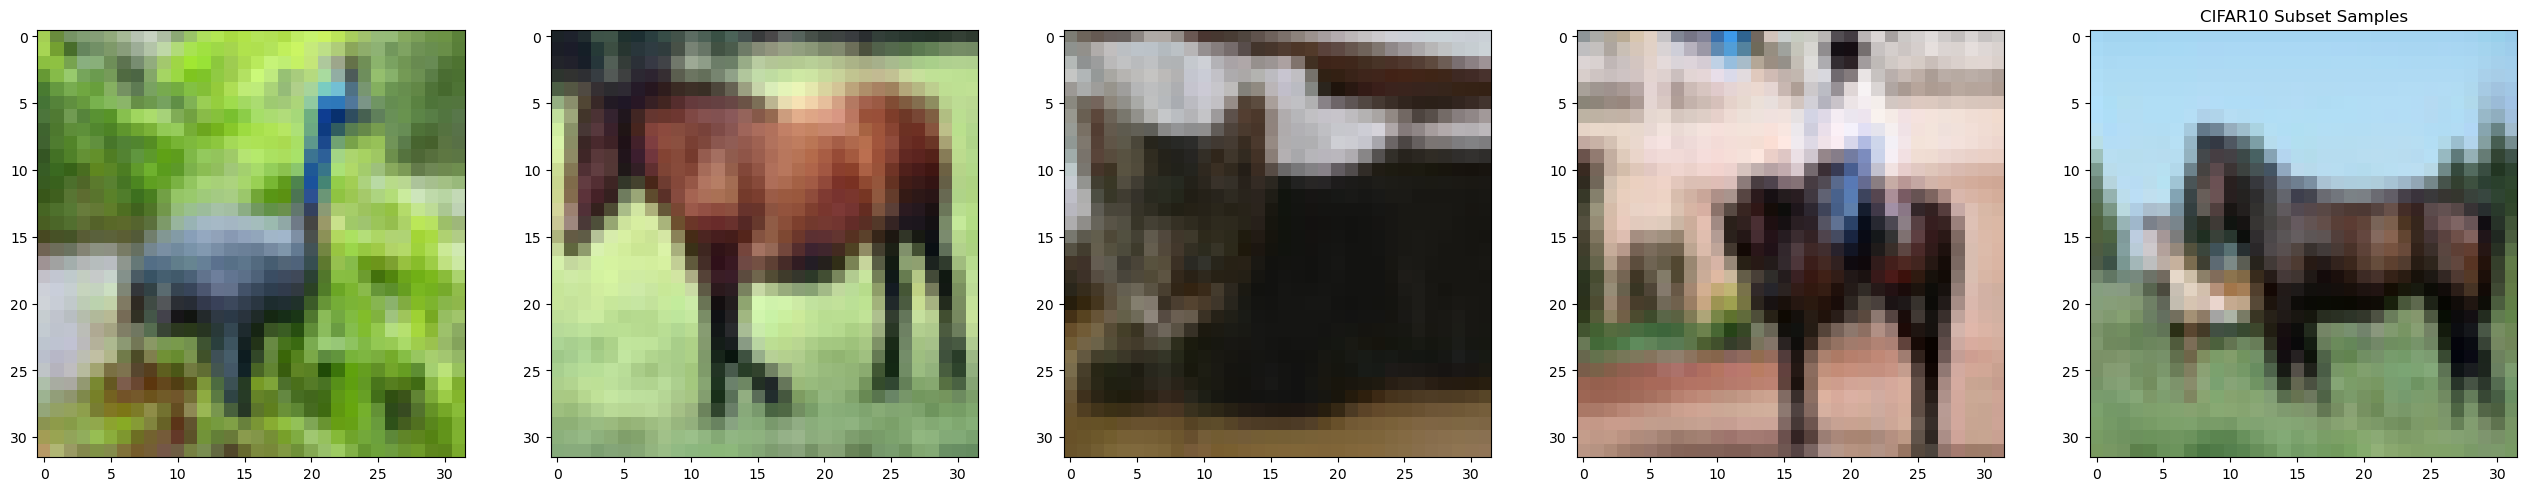

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.92156863].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.8039216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..0.9529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.96862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


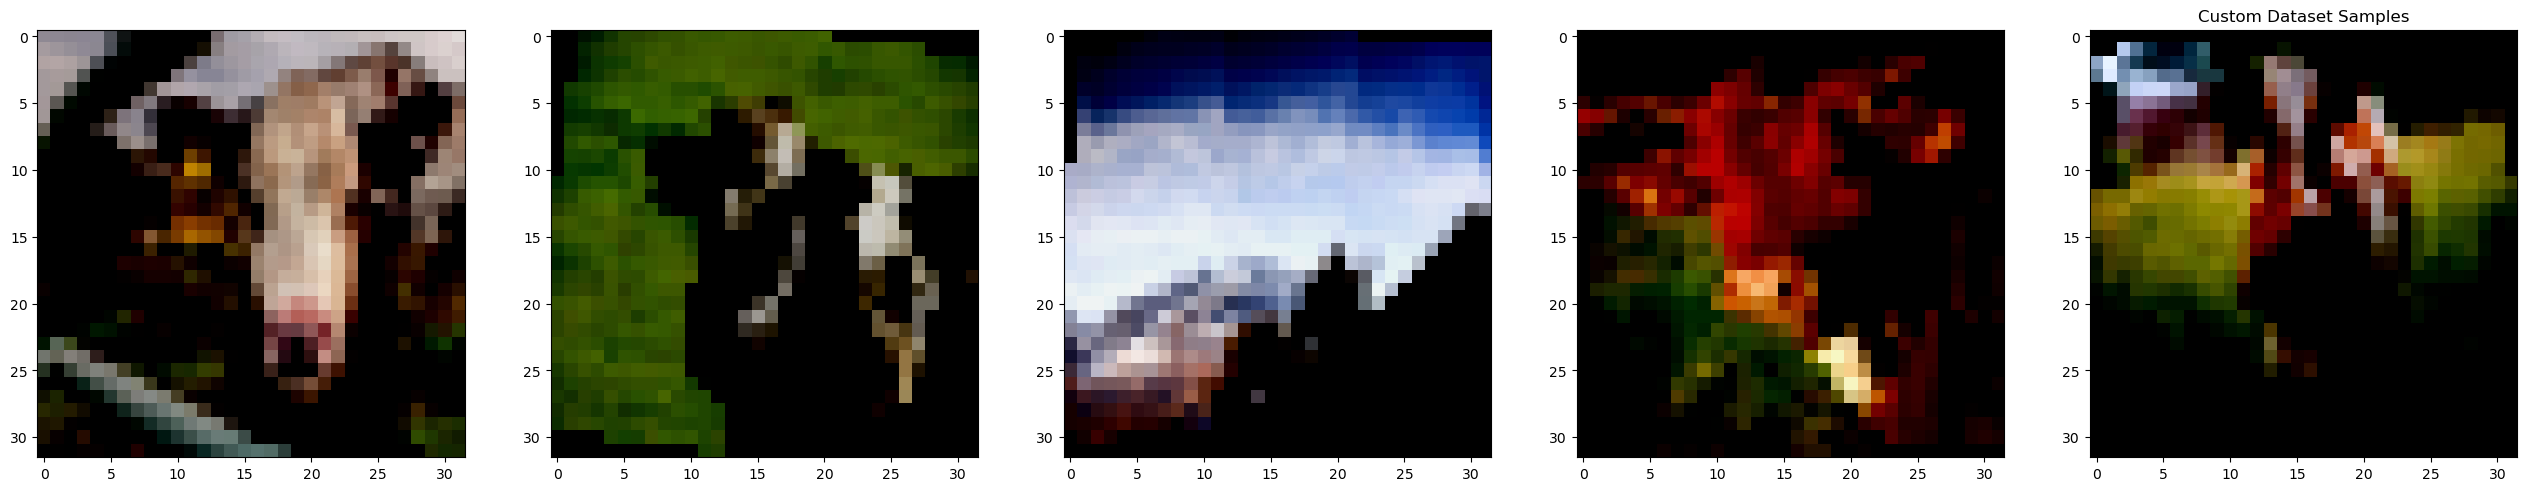

Dimensions of CIFAR: torch.Size([3, 32, 32])
Dimensions of Custom Image: torch.Size([3, 32, 32])


In [20]:
import torch
from torchvision import transforms, datasets
from torch . utils . data import DataLoader , Subset
import os
from PIL import Image
# ------------------------------------ 3.2.1.1 ------------------------------------
# Prepare CIFAR10 Dataset: Load CIFAR10 using torchvision.datasets.CIFAR10 (Borrow from Skeleton Code)
transform_cifar = transforms.Compose([transforms.ToTensor()])
cifar10 = datasets.CIFAR10(root = './data' , train = True , download = True , transform = transform_cifar)

# and filter 5 classes with 10 images each. (Borrow from Skeleton Code)
selected_classes = [0, 2, 3, 5, 7]

# Get indices of the selected classes (Borrow from Skeleton Code)
cifar_indices = [i for i, (_, label) in enumerate(cifar10) if label in selected_classes]

# Take 10 images per class (Borrow from Skeleton Code)
subset_cifar10 = Subset(cifar10, cifar_indices[:50])

# check the shape of the image tensor
image, label = subset_cifar10[0]
print(f"image shape: {image.shape}") ## image shape: torch.Size([3, 32, 32])


# ------------------------------------ 3.2.1.2 & 3.2.1.3 ------------------------------------
# Create Custom Dataset: Capture 20 images and store them in a folder and load them (Borrow from Skeleton Code)
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.image_paths = [os.path.join(root, img) for img in os.listdir(root)]
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, index):
        # this is called automatically by DataLoader when iterating
        # or accessing dataset elements
        img_path = self.image_paths[index]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, 0

# Augment them to create 30 new samples using transformations. 
transform_custom = transforms.Compose([
    transforms.Resize((32, 32)), # to match CIFAR10
    transforms.RandomRotation(10), 
    transforms.ColorJitter(brightness=0.1, contrast=0.1), 
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

# load it (Borrow from Skeleton Code)
custom_dataset = CustomDataset(root='data/Cow', transform=transform_custom)


augmented_images = [
    custom_dataset[i % len(custom_dataset)] 
    for i in range(50)
]

# check the shape of the image tensor
image, label= augmented_images[0]
print(f"augmented_images shape: {image.shape}") ## image shape: torch.Size([3, 32, 32])

print(f"Size of CIFAR10 subset: {len(subset_cifar10)} images")
print(f"Size of Custom Dataset: {len(augmented_images)} images")

# ------------------------------------ 3.2.1.4 ------------------------------------
# Visualize the datasets (Borrow from Skeleton Code)
import matplotlib.pyplot as plt

# Display a few samples from CIFAR10 (Borrow from Skeleton Code)
cifar_loader = DataLoader(subset_cifar10, batch_size=5, shuffle=False)

# When you use iter() and next() on a dataset or DataLoader, 
# it repeatedly calls __getitem__() to fetch the next sample. 
# Each call returns a new image (and possibly a label) based on 
# the current index.
batch = next(iter(cifar_loader))
cifar_images = batch[0]

fig, axes = plt.subplots(1, 5, figsize=(32, 32))

# Data augmentation to extraplolate to 50 samples (Borrow from Skeleton Code))
for i in range(5):
    axes[i].imshow(cifar_images[i] .permute(1, 2, 0))  # Convert [C, H, W] to [H, W, C] for displaying
plt.title("CIFAR10 Subset Samples")
plt.show()

augmented_images_loader = DataLoader(augmented_images, batch_size=5, shuffle=False)
batch = next(iter(augmented_images_loader))
aug_images = batch[0]

fig, axes = plt.subplots(1, 5, figsize=(32, 32))
for i in range(5):
    axes[i].imshow(aug_images[i].permute(1, 2, 0))  # Convert [C, H, W] to [H, W, C] for displaying
plt.title("Custom Dataset Samples")
plt.show()

print(f"Dimensions of CIFAR: {cifar_images[0].shape}") ## Dimensions of CIFAR: torch.Size([3, 32, 32])
print(f"Dimensions of Custom Image: {aug_images[0].shape}") ## Dimensions of Custom Image: torch.Size([3, 32, 32])


# 3.3 Using DataLoader for Parallel Processing
We need to efficiently handle batches of images using the torch.utils.data.DataLoader in this section.

First, use DataLoader to load the custom dataset CIFAR10 with batch size 4, and set num_worker to 2 to enable multi-threading. Multithreading is often used for data loading and preprocessing, especially when you're working with large datasets, multithreading load and preprocess datasets into batches more efficiently. In this exercise, we will measure the time of loading dataset with different batch size and num_workers. 

For the last part of 3.3, we need to find the maximum RGB channel value before and after normalization. I am going to use ```images = images * 0.5 + 0.5```to recover the image into before normalization. Typically, max values before normalization should be larger than those after normalization, I will check if the result meet the expectation.

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


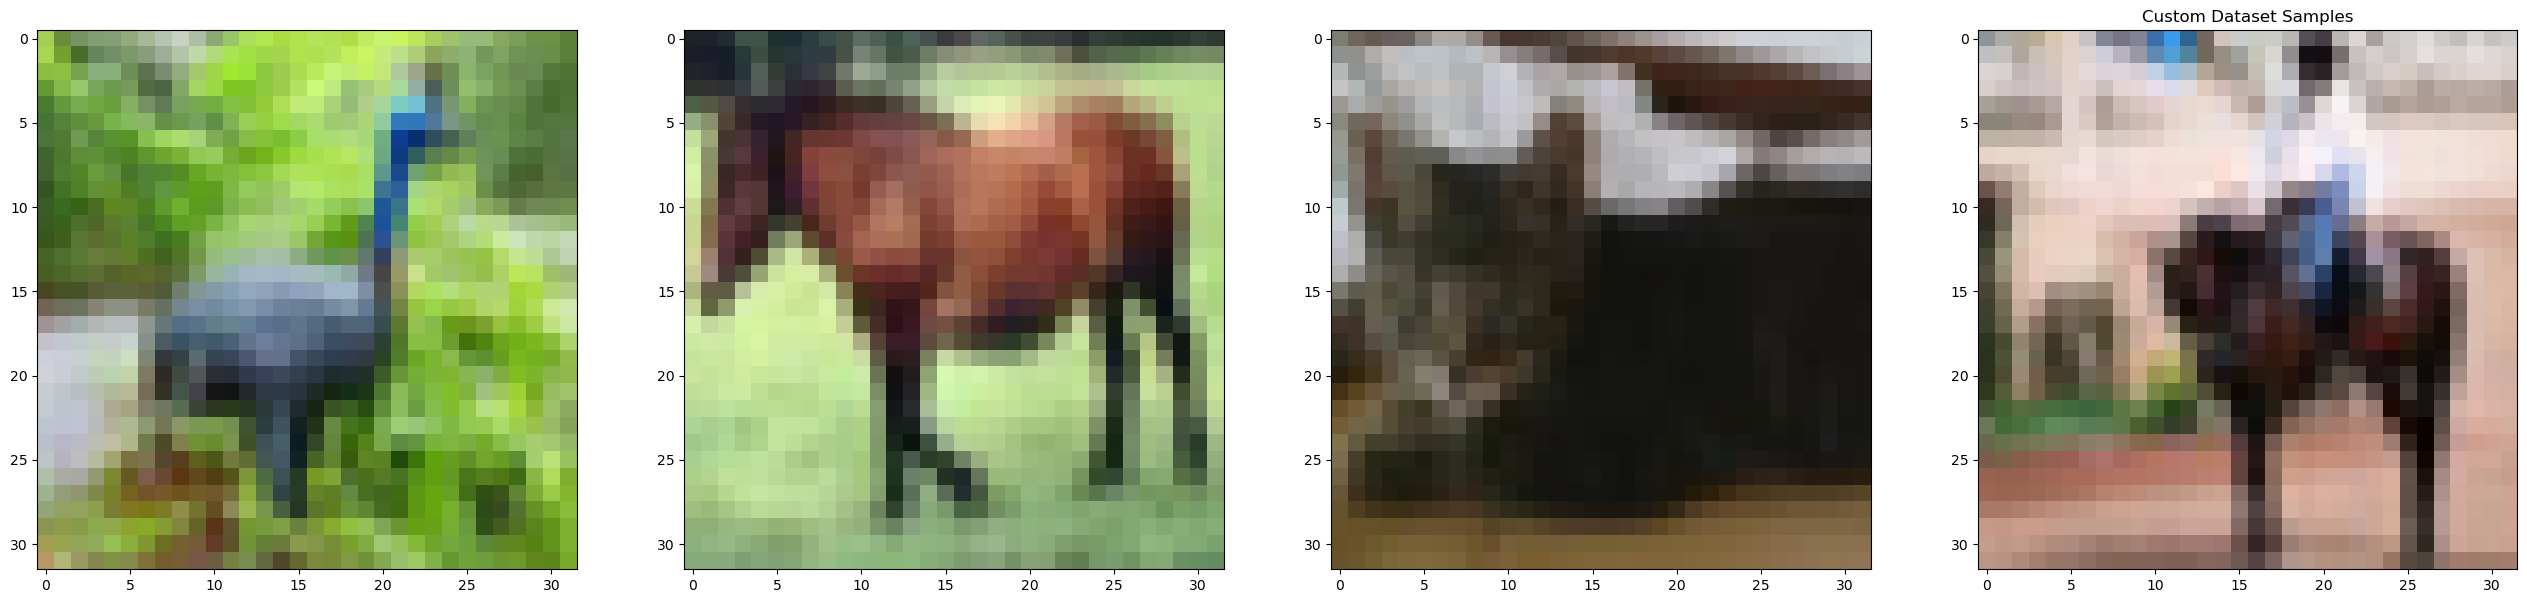

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.92156863].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.8039216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..0.9529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.96862745].


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


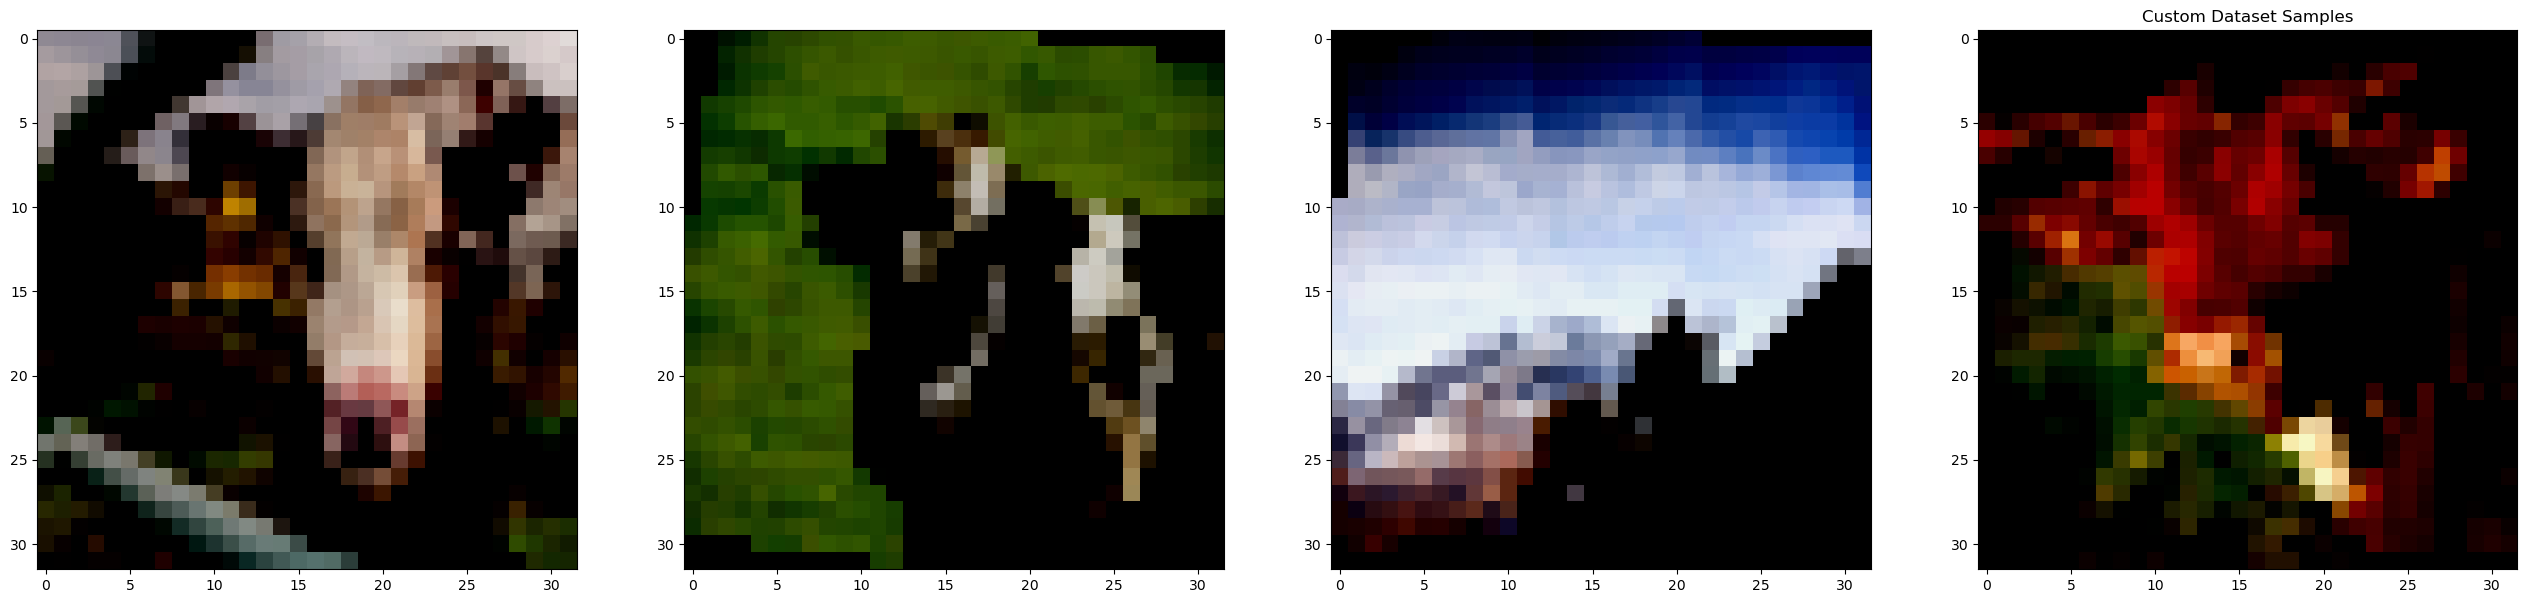

In [21]:
# ------------------------------------ 3.3.1 & 3.3.2 ------------------------------------
# Wrap your custom dataset class within a DataLoader instance, 
# similarly to how the CIFAR-10 dataset is loaded. Set the batch 
# size to 4 and enable multi-threading by setting num workers 
# to a value greater than 1.
customdataset_loader = DataLoader(augmented_images, batch_size = 4, num_workers = 2)
CIFAR10dataset_loader = DataLoader(subset_cifar10, batch_size = 4, num_workers = 2)

# ------------------------------------ 3.3.3 ------------------------------------
def plt_batch(dataloader):
    # Get a single batch
    batch= next(iter(dataloader))
    
    # Get image
    images = batch[0]

    fig, axes = plt.subplots(1, 4, figsize=(32, 32))
    for i in range(4):
        print(images[i].shape)  # Print the shape of the image tensor
        axes[i].imshow(images[i].permute(1, 2, 0))  # Convert [C, H, W] to [H, W, C] for displaying
    plt.title("Custom Dataset Samples")
    plt.show()
    
    

# Plot images from augmented dataset
plt_batch(CIFAR10dataset_loader)
plt_batch(customdataset_loader)


In [22]:
import time

# ------------------------------------ 3.3.4 ------------------------------------
# Augment them to create 1000 new samples using transformations. (Borrow from Skeleton Code)
transform_custom = transforms.Compose([
    transforms.Resize((32, 32)), # to match CIFAR10
    transforms.RandomRotation(10), 
    transforms.ColorJitter(brightness=0.1, contrast=0.1), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
  
])


# Measure the time taken to load and augment all 1000 images 
# using __getitem__ in a loop.
start_time = time.time()

# load it (Borrow from Skeleton Code)
custom_dataset = CustomDataset(root='data/Cow', transform=transform_custom)

# Data augmentation to extraplolate to 50 samples (Borrow from Skeleton Code))
augmented_images1000 = [
    custom_dataset[i % len(custom_dataset)] 
    for i in range(1000)
]
end_time = time.time()

# check the shape of the image tensor
image,label = augmented_images1000[0]
print(f"augmented_images shape: {image.shape}") ## image shape: torch.Size([3, 32, 32])

print(f"Size of Custom Dataset: {len(augmented_images1000)} images")

total_time_load_argument = end_time - start_time
print(f"Time taken to load and augment 1000 images: {total_time_load_argument:.2f} seconds")

# Measure the time taken by the DataLoader to process all 
# 1000 images with varying batch size and num workers.
customdataset1000_loader1 = DataLoader(augmented_images1000, batch_size = 4, num_workers = 2)
start_time = time.time()
for batch in customdataset1000_loader1:
        pass
end_time = time.time()
total_time_to_process1 = end_time - start_time
print(f"Time taken to process 1000 images with batch size  4 and 2 workers: {total_time_to_process1:.2f} seconds")

customdataset1000_loader2 = DataLoader(augmented_images1000, batch_size = 4, num_workers = 8)
start_time = time.time()
for batch in customdataset1000_loader2:
        pass
end_time = time.time()
total_time_to_process2 = end_time - start_time
print(f"Time taken to process 1000 images with batch size  4 and 8 workers: {total_time_to_process2:.2f} seconds")

customdataset1000_loader3 = DataLoader(augmented_images1000, batch_size = 16, num_workers = 2)
start_time = time.time()
for batch in customdataset1000_loader3:
        pass
end_time = time.time()
total_time_to_process3 = end_time - start_time
print(f"Time taken to process 1000 images with batch size 16 and 2 workers: {total_time_to_process3:.2f} seconds")

customdataset1000_loader4 = DataLoader(augmented_images1000, batch_size = 16, num_workers = 8)
start_time = time.time()
for batch in customdataset1000_loader4:
        pass
end_time = time.time()
total_time_to_process4 = end_time - start_time
print(f"Time taken to process 1000 images with batch size 16 and 8 workers: {total_time_to_process4:.2f} seconds")





augmented_images shape: torch.Size([3, 32, 32])
Size of Custom Dataset: 1000 images
Time taken to load and augment 1000 images: 11.67 seconds
Time taken to process 1000 images with batch size  4 and 2 workers: 1.10 seconds
Time taken to process 1000 images with batch size  4 and 8 workers: 2.60 seconds
Time taken to process 1000 images with batch size 16 and 2 workers: 1.06 seconds
Time taken to process 1000 images with batch size 16 and 8 workers: 2.65 seconds


In [34]:
# ------------------------------------ 3.3.5 ------------------------------------
# For at least one batch, compute the maximum of each RGB channel 
# value of the images before and after normalization.

# After normalization
batch = next(iter(customdataset1000_loader1))
images, _ = batch  
print(f"Shape of the image: {images.shape}")

# # Mean across batch, height, and width
# mean = images.mean(dim=(0, 2, 3))  
# # Standard deviation across batch, height, and width
# std = images.std(dim=(0, 2, 3)) 
# print(f"Mean RGB values after normalization: {mean}")
# print(f"Standard deviation RGB values after normalization: {std}")

# computes the maximus along the width
max_rgb = images.max(dim=2)[0]
print(f"Shape of the max_rgb: {max_rgb.shape}")

# computes the maximus along the height
max_rgb = max_rgb.max(dim=2)[0]
print(f"Shape of the max_rgb: {max_rgb.shape}")

print(f"Max RGB values after normalization: {max_rgb}")




# Before normalization
images = images * 0.5 + 0.5
print(f"Shape of the image: {images.shape}")

# # Mean across batch, height, and width
# mean = images.mean(dim=(0, 2, 3))  
# # Standard deviation across batch, height, and width
# std = images.std(dim=(0, 2, 3)) 
# print(f"Mean RGB values after normalization: {mean}")
# print(f"Standard deviation RGB values after normalization: {std}")

# computes the maximus along the width
max_rgb = images.max(dim=2)[0]
print(f"Shape of the max_rgb: {max_rgb.shape}")

# computes the maximus along the height
max_rgb = max_rgb.max(dim=2)[0]
print(f"Shape of the max_rgb: {max_rgb.shape}")

print(f"Max RGB values before normalization: {max_rgb}")




Shape of the image: torch.Size([4, 3, 32, 32])
Shape of the max_rgb: torch.Size([4, 3, 32])
Shape of the max_rgb: torch.Size([4, 3])
Max RGB values after normalization: tensor([[0.9765, 0.9373, 0.8667],
        [1.0000, 1.0000, 0.9922],
        [0.9529, 0.9686, 0.9765],
        [0.8745, 0.8431, 0.6392]])
Shape of the image: torch.Size([4, 3, 32, 32])
Shape of the max_rgb: torch.Size([4, 3, 32])
Shape of the max_rgb: torch.Size([4, 3])
Max RGB values before normalization: tensor([[0.9882, 0.9686, 0.9333],
        [1.0000, 1.0000, 0.9961],
        [0.9765, 0.9843, 0.9882],
        [0.9373, 0.9216, 0.8196]])


# 3.4 Exploring Random Seed and Reproducibility
This section will be focus on using random seed for reproducibility. Reproducibility allows researcher to verify result, if outcome can not be reproduced, the validity will be questionable. The weight initialization, data shuffling, data augmentation, and batch selection will be random in various stages, and they will all determine the outcome. Hence, setting a random seed for reporducibility is very important in deep learning experiments.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6392157].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].


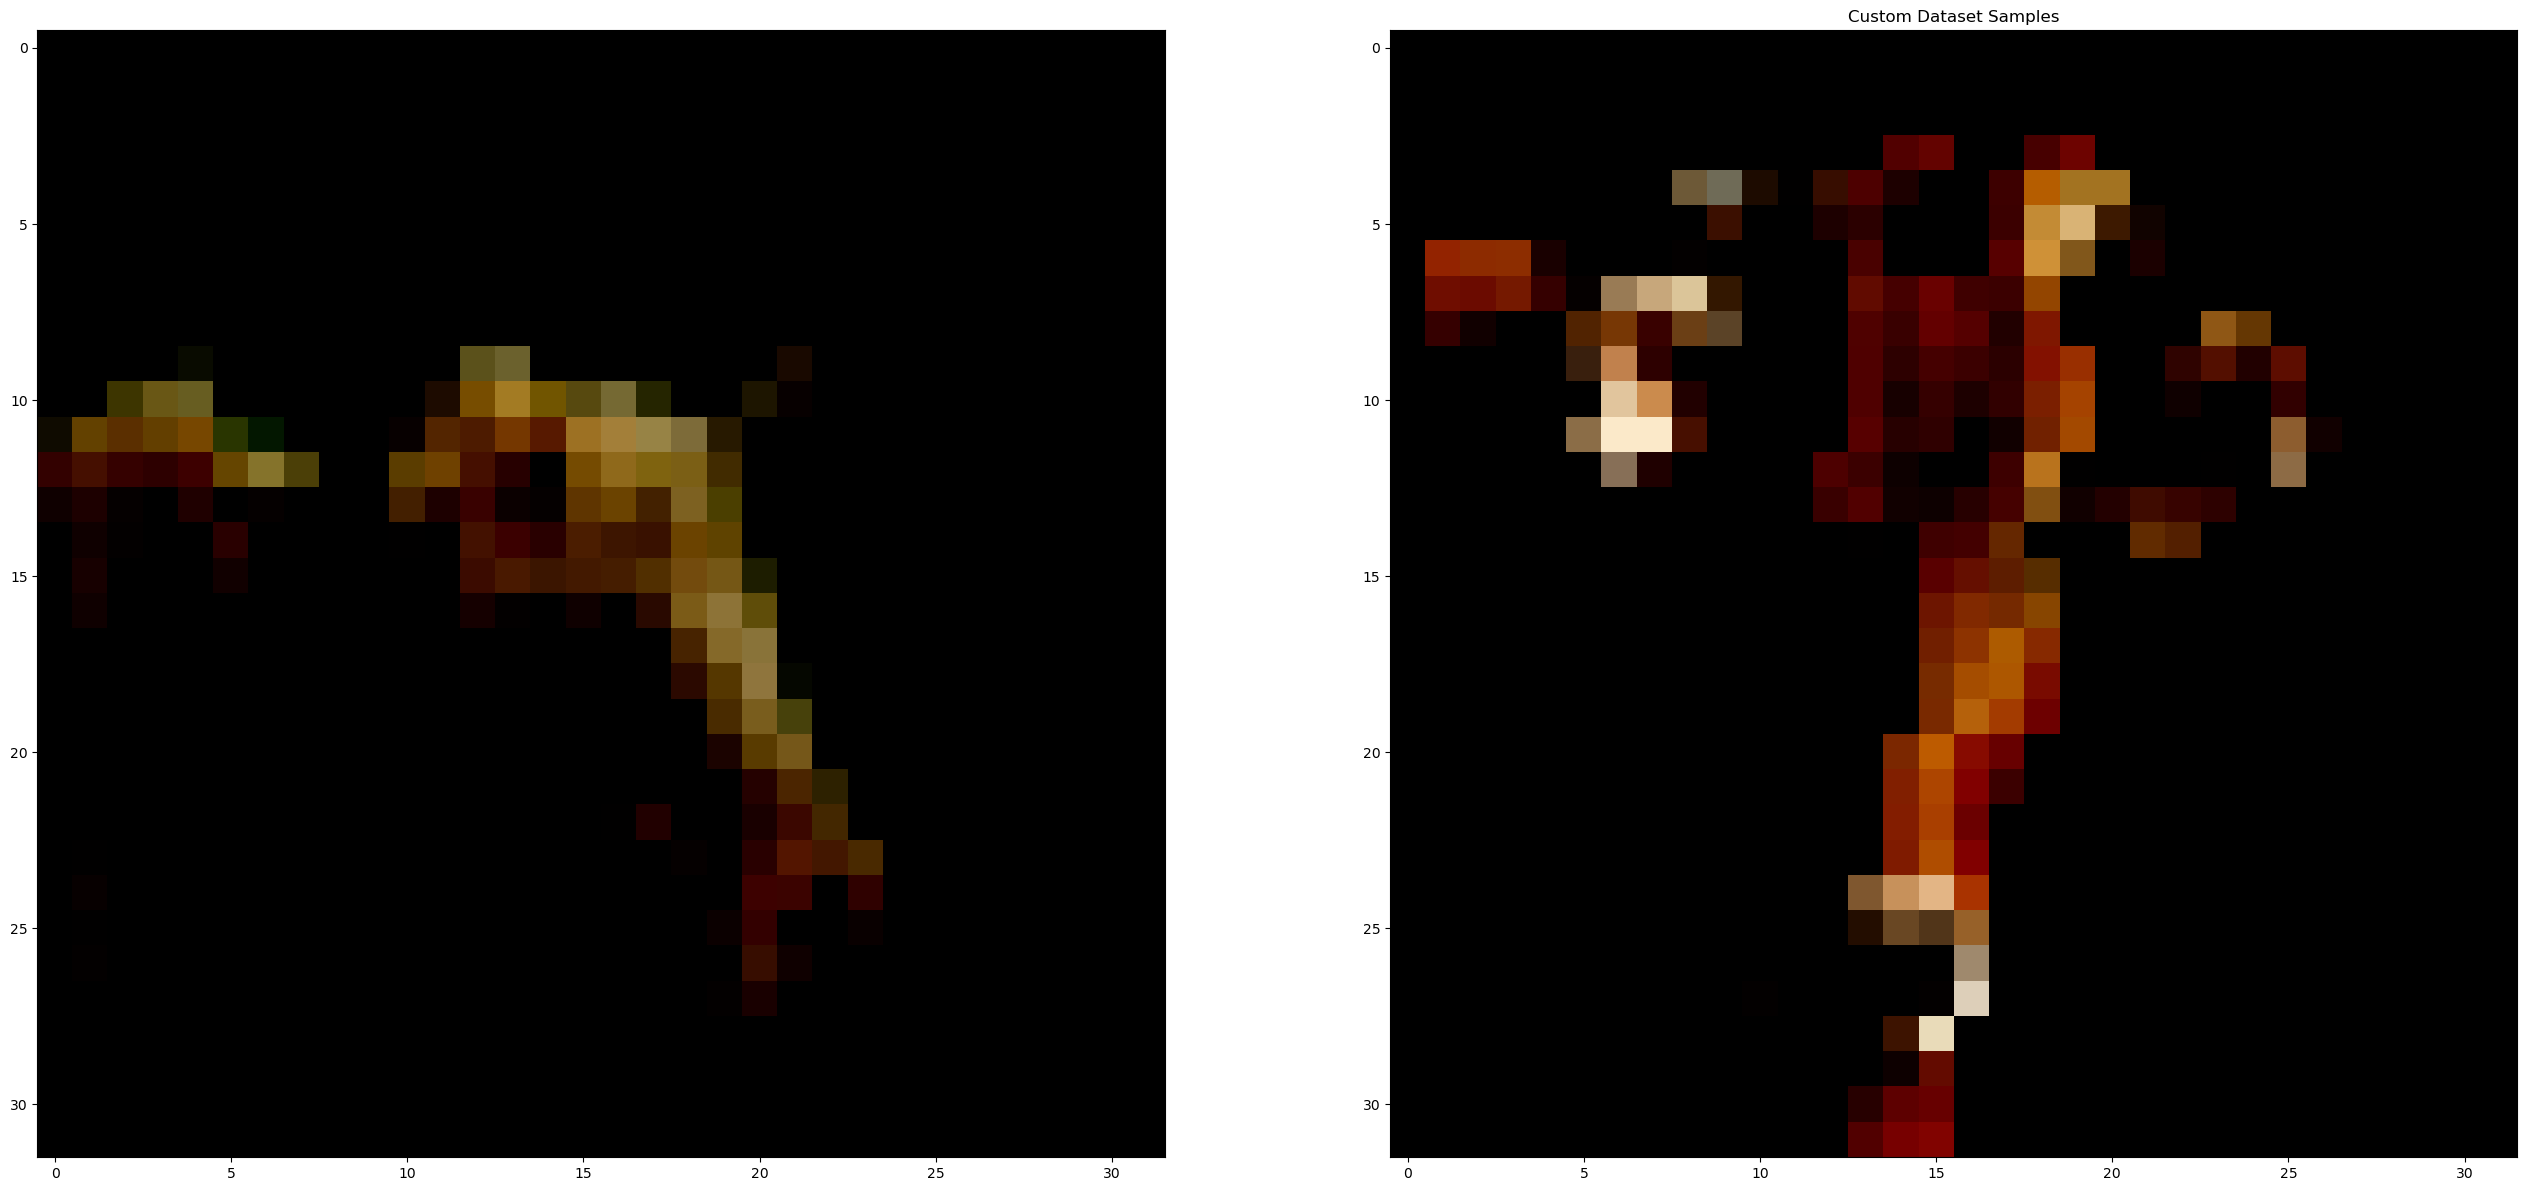

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.96862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92156863..0.8745098].


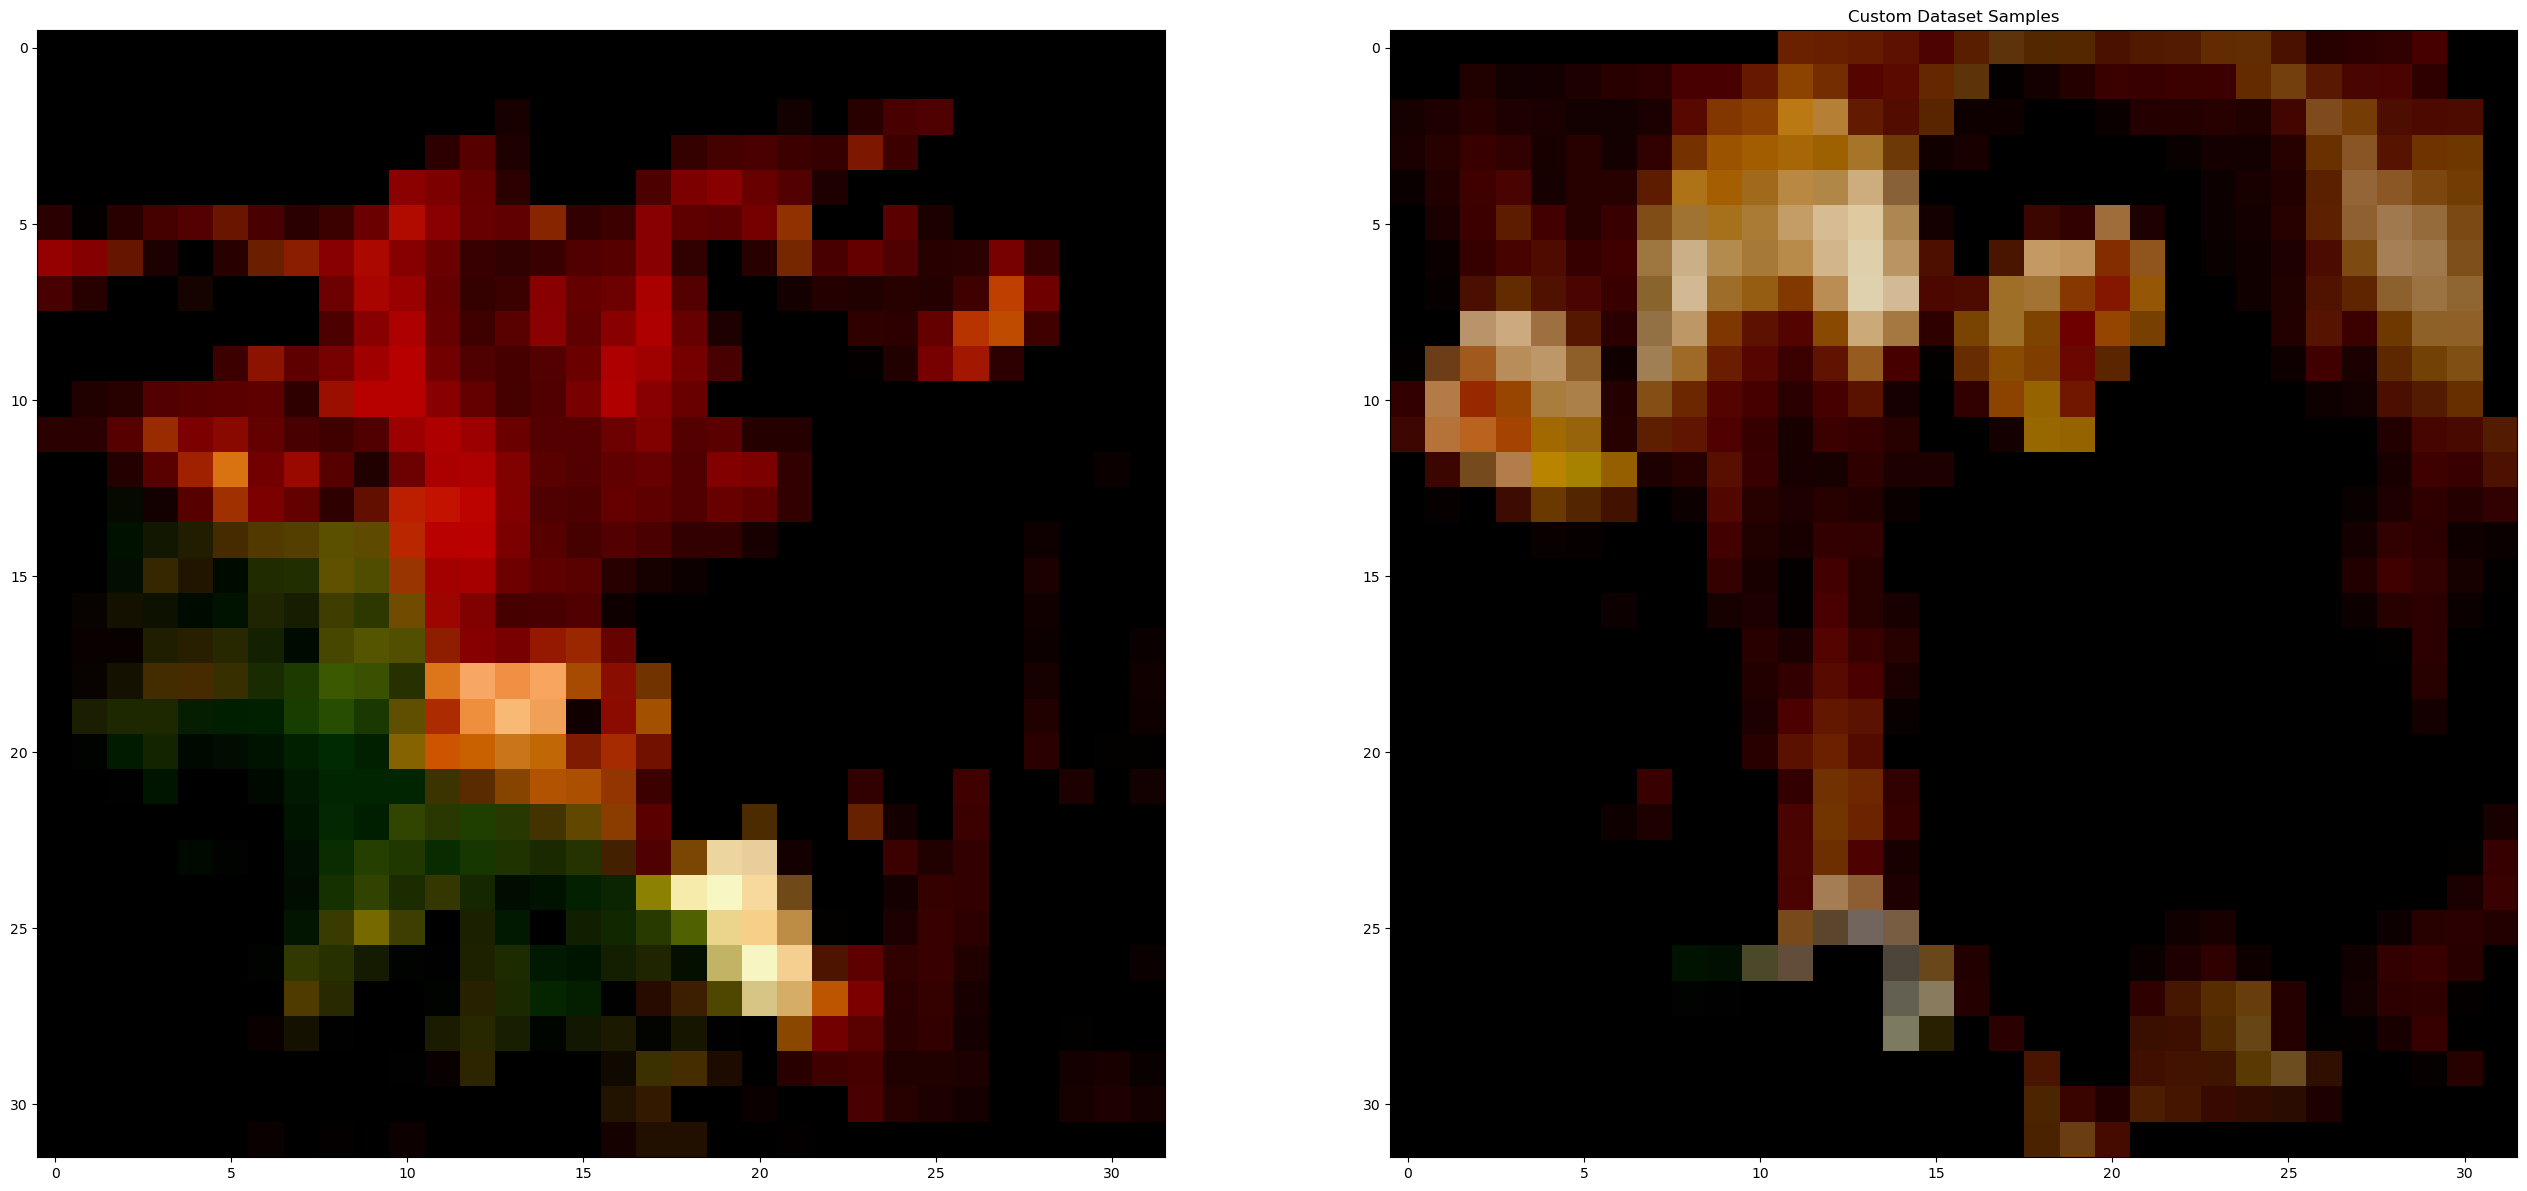

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.90588236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].


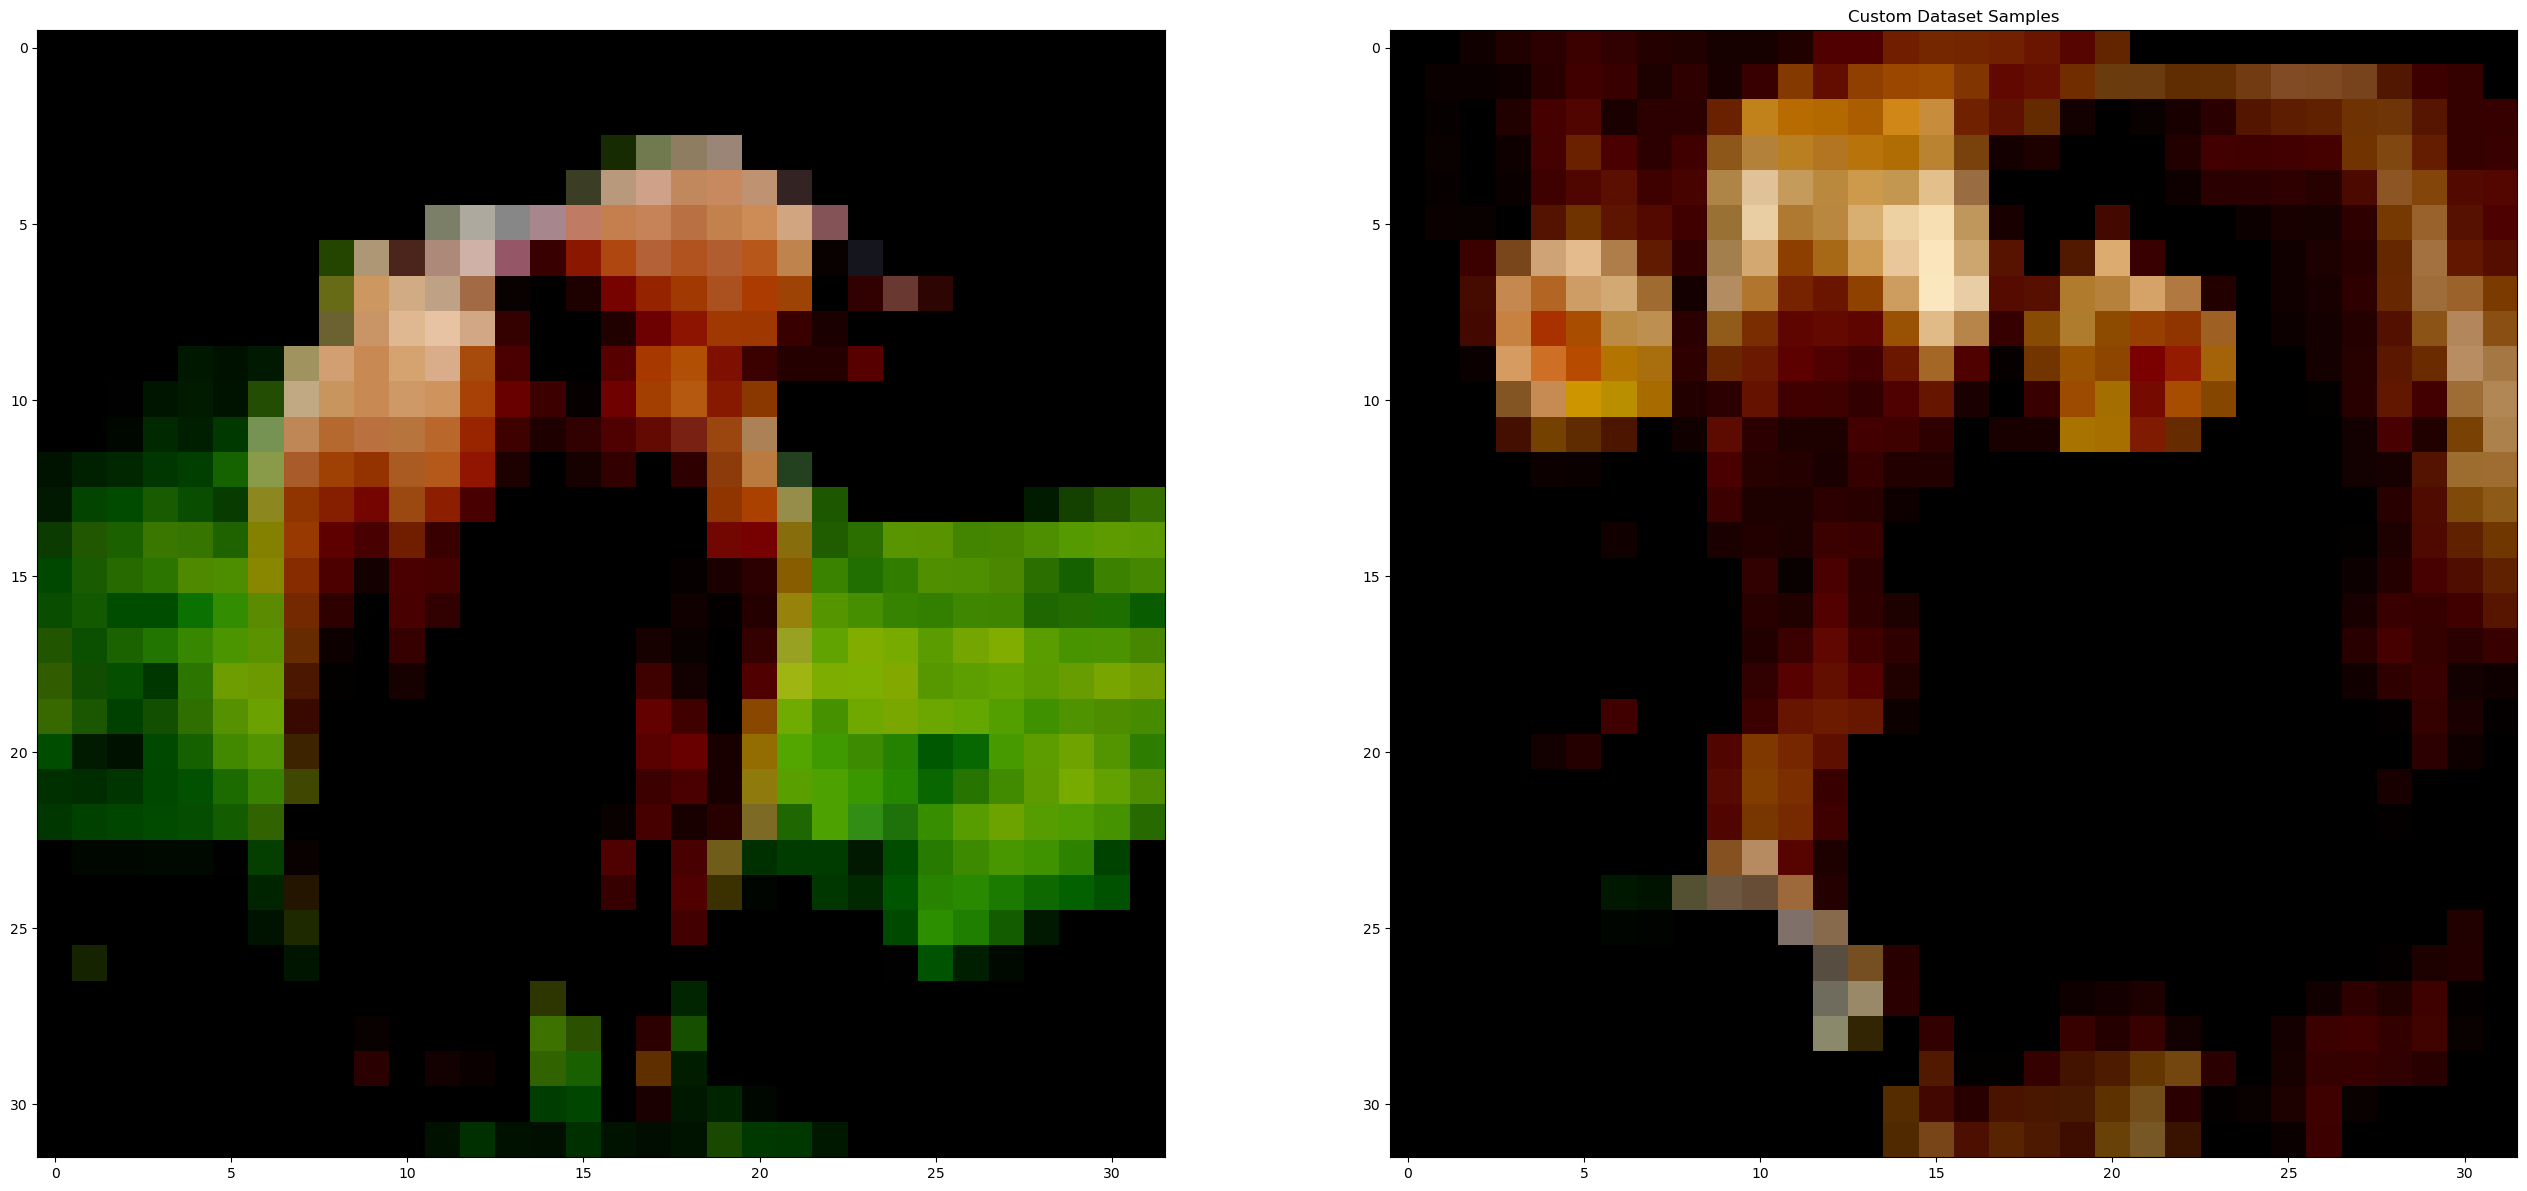

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.90588236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].


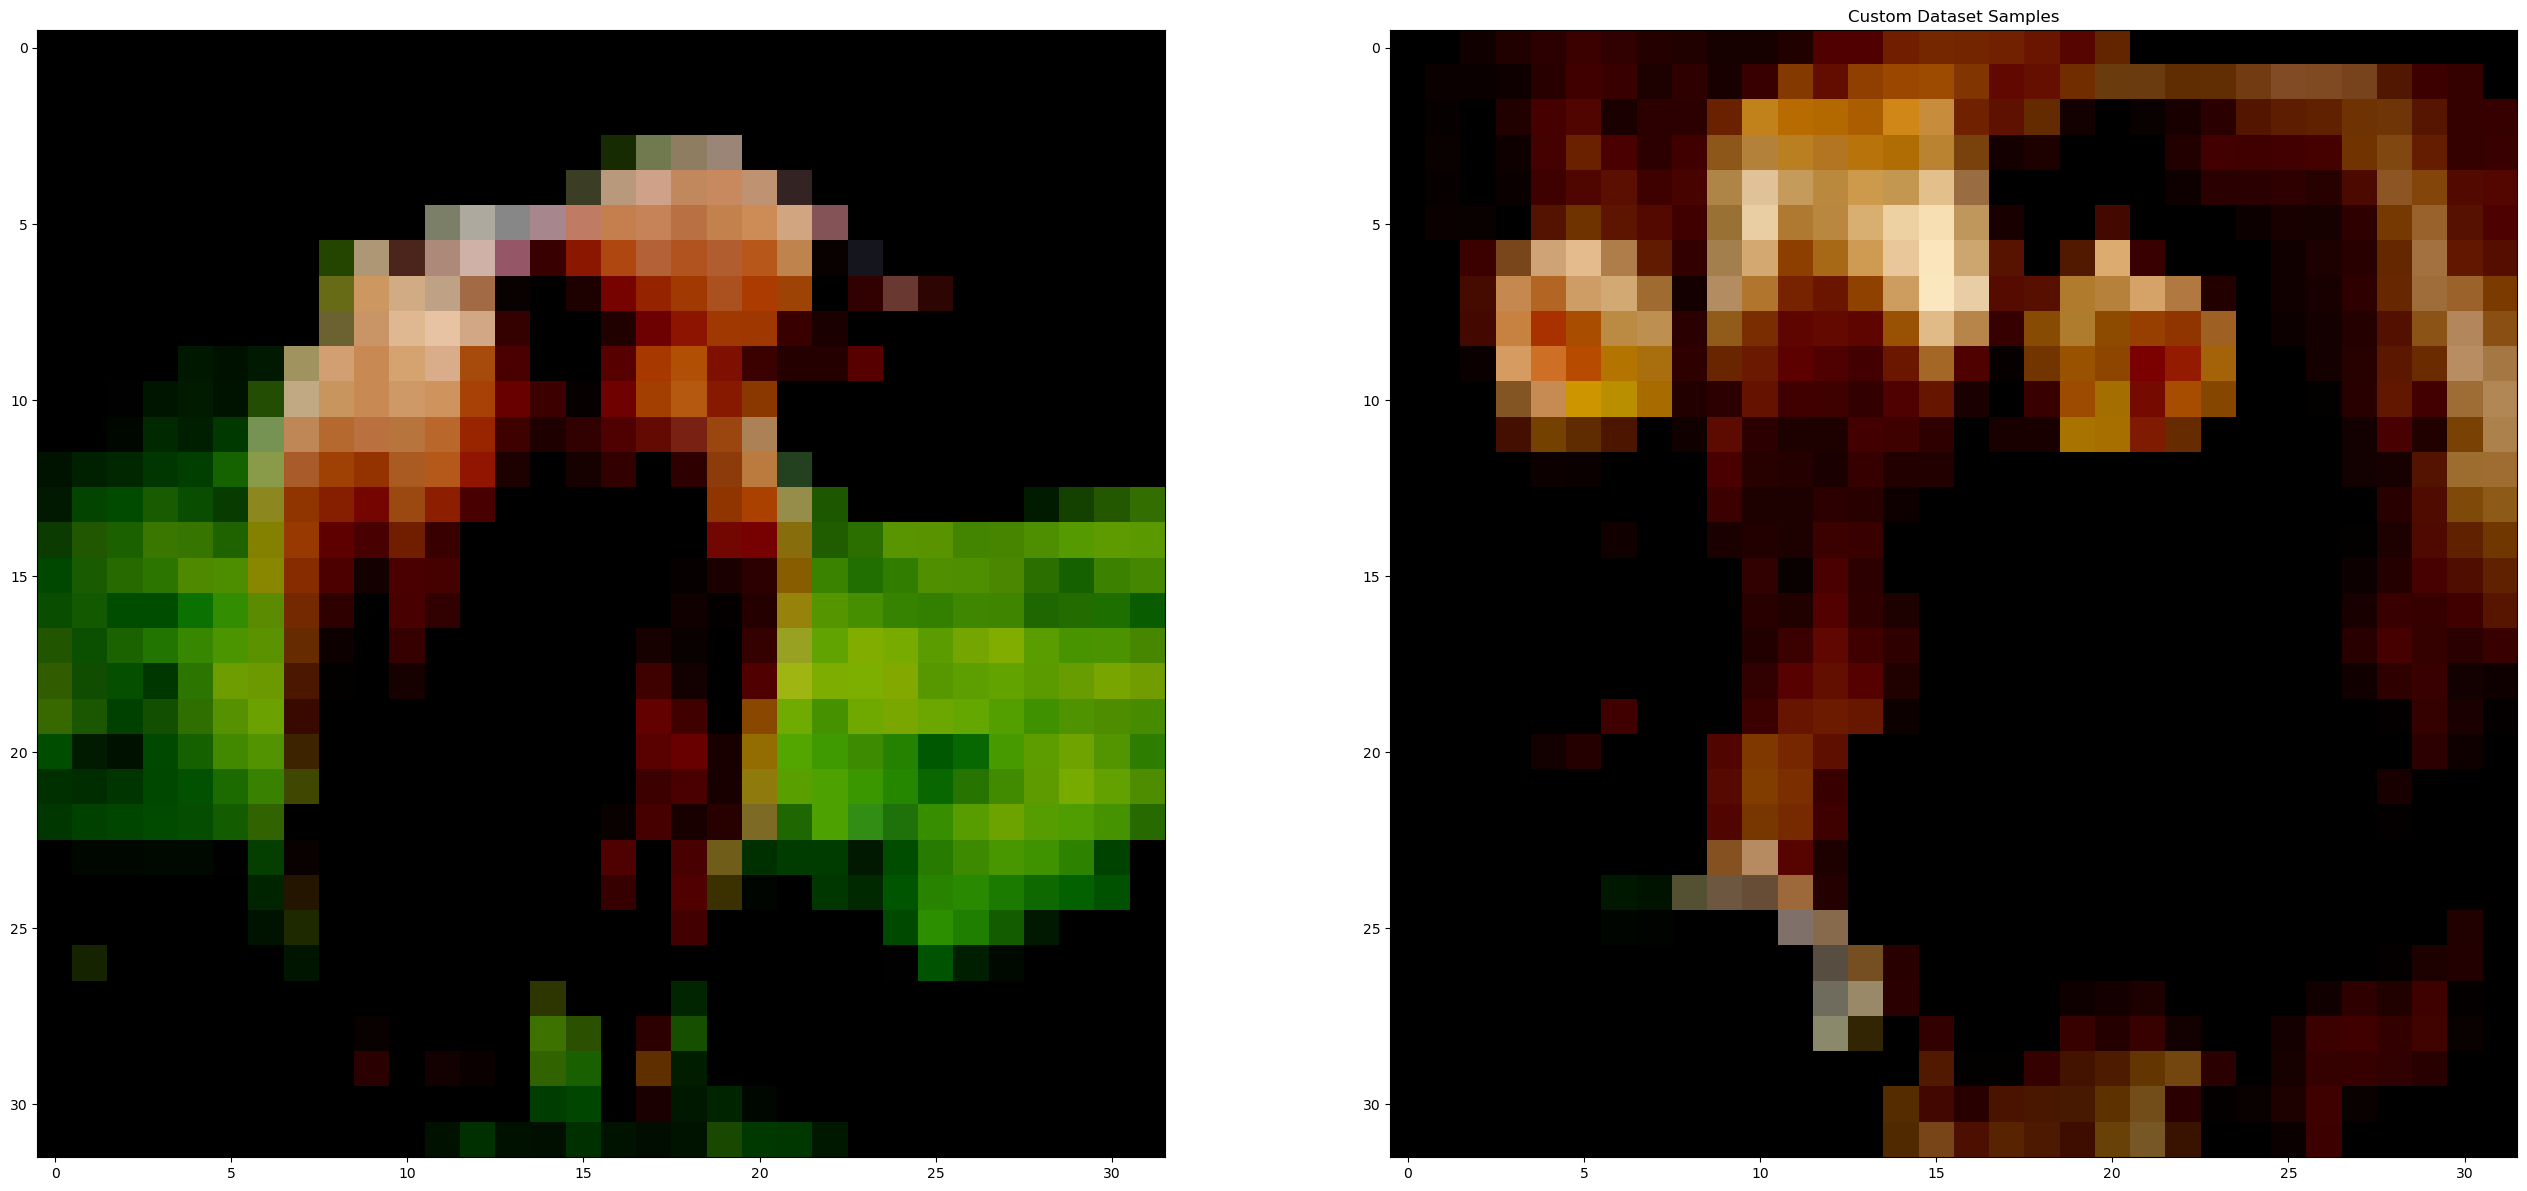

In [47]:
def plt_batch(dataloader):
    # Get a single batch
    batch= next(iter(dataloader))
    
    # Get image
    images = batch[0]

    fig, axes = plt.subplots(1, 2, figsize=(32, 32))
    for i in range(2):
        axes[i].imshow(images[i].permute(1, 2, 0))  # Convert [C, H, W] to [H, W, C] for displaying
    plt.title("Custom Dataset Samples")
    plt.show()


# Without setting a random seed
augmented_images_loader_without_seed = DataLoader(augmented_images, batch_size=2, shuffle=True)
plt_batch(augmented_images_loader_without_seed)
augmented_images_loader_without_seed = DataLoader(augmented_images, batch_size=2, shuffle=True)
plt_batch(augmented_images_loader_without_seed) ## image should not be the same as the previous one



# With a random seed
torch.manual_seed(60146)
augmented_images_loader_with_seed = DataLoader(augmented_images, batch_size=2, shuffle=True)
plt_batch(augmented_images_loader_with_seed)
torch.manual_seed(60146) 
augmented_images_loader_with_seed = DataLoader(augmented_images, batch_size=2, shuffle=True)
plt_batch(augmented_images_loader_with_seed) ## image should be the same as the previous one

